In [94]:
# from _keys import db_user, db_password, db_name, db_host, db_port
# import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
# sql = """
# select t1.author, subreddit, to_timestamp(time_created)::date as day_created, account_created, t1.is_bot from
# 	(select *
# 	from (
# 		select author, title as submission, created_utm as time_created, subreddit, 'post' as submission_type, 'True' as is_bot
# 		from sus_user_posts
# 		where title !='This account is banned and is temporarily preserved for purposes of transparency.') as posts_aggregate
# 	union
# 	select *
# 	from (
# 		select author, title as submission, created_utm as time_created, subreddit, 'post' as submission_type, 'False' as is_bot
# 		from norm_user_posts) as norm_posts_aggregate
# 	where subreddit in ( 
# 		select subreddit
# 		from sus_user_posts
# 		inner join subreddit_info on sus_user_posts.subreddit = subreddit_info.subreddit_name
# 		where over18 = 'False'and subreddit not in ('u_reddit', 'funny', 'gifs', 'aww', 'AnimalsBeingBros', 'corgi', 'gif', 'cats', 'memes', 'pics', 'dogpictures', 'puppies', 'UpliftingNews', 'celebrities')
# 		group by subreddit
# 		order by count(*) desc
# 		limit 30)) 
# 	as t1
# inner join (
# 	select *
# 	from (
# 		select sus_user_name as author, account_created as account_created, 'True' as is_bot
# 		from sus_users
# 	) as sus_users
# 	union
# 	select  *
# 	from (
# 		select norm_user_name as author, account_created as account_created, 'False' as is_bot
# 		from norm_users
# 	) as norm_users
# 	)as t2 on t1.author = t2.author
# """

In [96]:
# conn = psycopg2.connect(dbname=db_name, user=db_user, password=db_password, host=db_host, port=db_port)
# cur = conn.cursor()

In [97]:
# df = pd.read_sql(sql, conn)
# df.to_csv('reddit_posts_adhoc_for_meta_pivot.csv', index=False)

In [98]:
df_pivoted = pd.read_csv('../pivoted_bs.csv')

C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [99]:
df_pivoted = df_pivoted.fillna(0)
df_pivoted = df_pivoted.drop(["Grand Total"], axis=1)

In [100]:
#replace true with 1 and false with 0 in is_bot column
df_pivoted['is_bot'] = df_pivoted['is_bot'].replace(to_replace=[True, False], value=[1, 0])
df_pivoted.head()

,author,is_bot,account_created,100BlackMen,2016_elections,3Dprinting,4chan,90sHipHop,a:t5_2xci7,a:t5_32eom,...,WomenOfColor,workout,worldnews,worldpolitics,WTF,WWE,WWII,wyoming,yoga,YoungRepublicans
0,_____----------_____,0,1.422271e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,______DEADPOOL______,0,1.374769e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,_____D34DP00L_____,0,1.418606e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,_____Deadpool,0,1.425436e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,_____goats,0,1.425569e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [102]:
X = df_pivoted.drop(['author', 'is_bot'], axis=1)
y = df_pivoted['is_bot']

In [114]:
def rf_regressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=2)
    reg = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42, max_depth=None)
    reg.fit(X_train, y_train)
    print(f'train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
    plt.scatter(y_train, reg.predict(X_train), color='blue')
    plt.scatter(y_test, reg.predict(X_test), color='red')
    plt.show()
    print("--------------------")
    print(confusion_matrix(y_test, reg.predict(X_test), labels=[1,0]))
    print(classification_report(y_test, reg.predict(X_test), labels=[1,0]))
    print(f1_score(y_test, reg.predict(X_test), labels=[1,0]))
    return reg


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=2)
for i in range(20,30,1):
    reg = DecisionTreeClassifier(max_leaf_nodes=i, random_state=42, max_depth=i)
    reg.fit(X_train, y_train)
    print(f'{i} depth----train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
    print(confusion_matrix(y_test, reg.predict(X_test), labels=[1,0]))

20 depth----train: 0.9981454005934718 test: 0.996538081107814
[[ 130   27]
 [   1 7930]]
21 depth----train: 0.998269040553907 test: 0.996538081107814
[[ 130   27]
 [   1 7930]]
22 depth----train: 0.9983926805143423 test: 0.996538081107814
[[ 130   27]
 [   1 7930]]
23 depth----train: 0.9985163204747775 test: 0.9966617210682492
[[ 131   26]
 [   1 7930]]
24 depth----train: 0.9986399604352126 test: 0.9966617210682492
[[ 131   26]
 [   1 7930]]
25 depth----train: 0.9987636003956478 test: 0.9966617210682492
[[ 131   26]
 [   1 7930]]
26 depth----train: 0.9988872403560831 test: 0.9969090009891197
[[ 133   24]
 [   1 7930]]
27 depth----train: 0.9990108803165183 test: 0.9969090009891197
[[ 133   24]
 [   1 7930]]
28 depth----train: 0.9991345202769535 test: 0.9969090009891197
[[ 133   24]
 [   1 7930]]
29 depth----train: 0.9992581602373887 test: 0.9969090009891197
[[ 133   24]
 [   1 7930]]


train: 0.9966617210682492 test: 0.9957962413452027


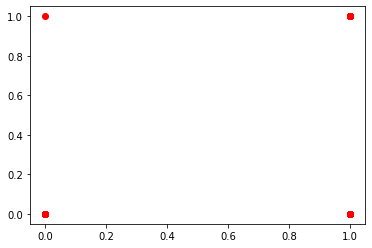

--------------------
[[ 124   33]
 [   1 7930]]
              precision    recall  f1-score   support

           1       0.99      0.79      0.88       157
           0       1.00      1.00      1.00      7931

    accuracy                           1.00      8088
   macro avg       0.99      0.89      0.94      8088
weighted avg       1.00      1.00      1.00      8088

0.8794326241134751


In [115]:
reg = rf_regressor(X, y)

In [116]:
features_df = pd.DataFrame(zip(X.columns, reg.feature_importances_), columns=['feature', 'importance']).sort_values('importance', ascending=False)
features_df.head(20)

,feature,importance
287,funny,0.645440
626,snapleaks,0.112704
76,aww,0.075372
191,CryptoCurrencies,0.060433
185,corgi,0.030262
667,test,0.022734
359,husky,0.022717
659,TalkShowGirls,0.015173
450,meme,0.015165
503,nottheonion,0.000000


In [117]:
# #export model
# import pickle
# descision_tree_model = pickle.dumps(reg)
# pickle.dump(descision_tree_model, open('descision_tree_model.pkl', 'wb'))
